## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
df = pd.read_csv('data/EUR_USD.csv', skiprows=6)

df.columns = ['Date', 'Close', 'OBS Status']
df = df.drop('OBS Status', axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

df.dropna(inplace=True)

## Mean-Reversion Strategy

In [3]:
half_life = 641     # From mean-reversion-and-stationarity.ipynb

# Moving Average & Std. Deviation
df['MovingAvg'] = df['Close'].rolling(window=half_life).mean()
df['MovingStd'] = df['Close'].rolling(window=half_life).std()

# Z-Score & Position
df['Z'] = (df['Close'] - df['MovingAvg']) / df['MovingStd']
df['Position'] = -df['Z']

## P&L Visualization

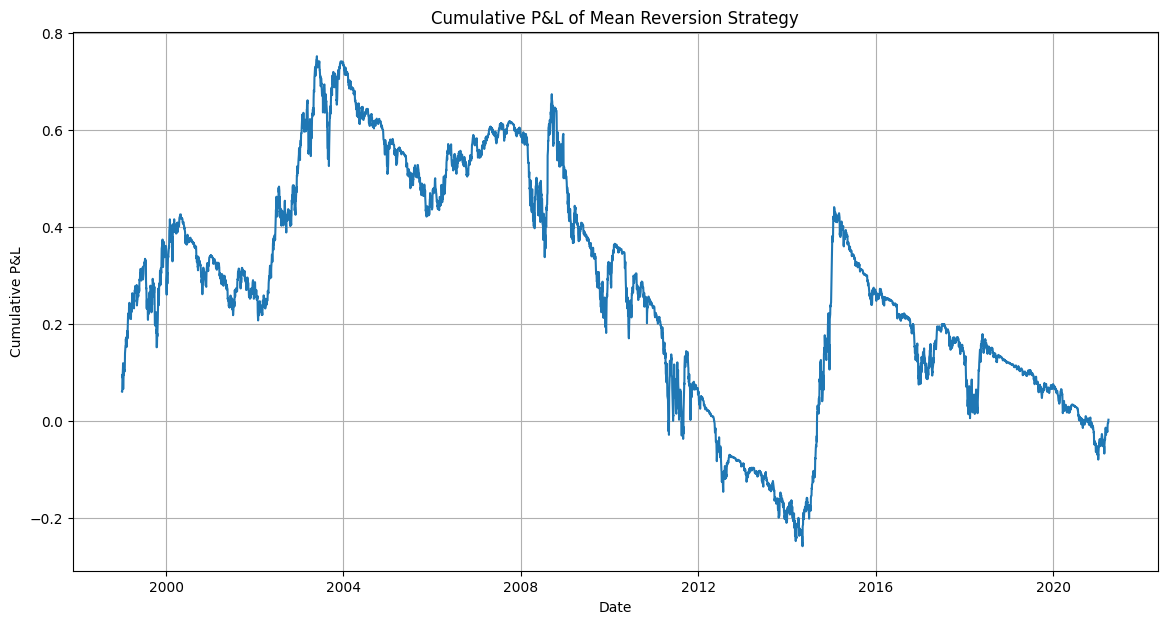

In [4]:
# Daily & Cumulative P&L
df['PnL'] = df['Position'].shift(1) * (df['Close'].diff())
df['Cumulative PnL'] = df['PnL'].cumsum()

# Plot
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Cumulative PnL'])
plt.title('Cumulative P&L of Mean Reversion Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L')
plt.grid(True)
plt.show()